<a href="https://colab.research.google.com/github/CirineDounia/TP_Random_Forest/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# =============================================================================
# ███████████████████████████████████████████████████████████████████████████
# PROJET RANDOM FOREST - TP Data Science
# Auteur: AMAOUCHE Dounia - MELIANI Ouezna
# ███████████████████████████████████████████████████████████████████████████
# =============================================================================

In [12]:
# =============================================================================
# 1. IMPORTS DES LIBRAIRIES
# =============================================================================

# Librairies de base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration matplotlib
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

# Chargement des données
from sklearn.datasets import load_breast_cancer, fetch_california_housing

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Modèles
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

# Métriques - Classification
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix,
    classification_report, ConfusionMatrixDisplay
)

# Métriques - Régression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Visualisation des arbres
from sklearn.tree import plot_tree, export_text

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel

# Gestion du déséquilibre
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Utilitaires
import time
from datetime import datetime

# Configuration
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
pd.set_option('display.max_columns', None)

print("✅ Toutes les librairies importées avec succès!")
print(f"📅 Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ Toutes les librairies importées avec succès!
📅 Date: 2025-12-10 11:23:48


In [18]:
# =============================================================================
# 2. CHARGEMENT DES DONNÉES
# =============================================================================

# Choisir UN dataset parmi les options
# Option 1: Breast Cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Option 2: California Housing (décommenter si vous utilisez celui-ci)
# data = fetch_california_housing()
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df['target'] = data.target

# Option 3: CSV (décommenter si vous utilisez un fichier CSV)
# df = pd.read_csv('votre_fichier.csv')

print("=" * 80)
print("INFORMATIONS SUR LE DATASET")
print("=" * 80)
print(f"📏 Dimensions: {df.shape}")
print(f"📊 Nombre de lignes: {df.shape[0]}")
print(f"📊 Nombre de colonnes: {df.shape[1]}")
print("\n📊 Informations:")
print(df.info())
print("\n📋 Aperçu des données:")
df.head()

INFORMATIONS SUR LE DATASET
📏 Dimensions: (569, 31)
📊 Nombre de lignes: 569
📊 Nombre de colonnes: 31

📊 Informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0
1,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890,0
2,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876,0
3,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730,0
4,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768,0



📈 STATISTIQUES DESCRIPTIVES:
       mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
count     569.0000      569.0000        569.0000   569.0000         569.0000   
mean       14.1273       19.2896         91.9690   654.8891           0.0964   
std         3.5240        4.3010         24.2990   351.9141           0.0141   
min         6.9810        9.7100         43.7900   143.5000           0.0526   
25%        11.7000       16.1700         75.1700   420.3000           0.0864   
50%        13.3700       18.8400         86.2400   551.1000           0.0959   
75%        15.7800       21.8000        104.1000   782.7000           0.1053   
max        28.1100       39.2800        188.5000  2501.0000           0.1634   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
count          569.0000        569.0000             569.0000       569.0000   
mean             0.1043          0.0888               0.0489         0.1812   
std         

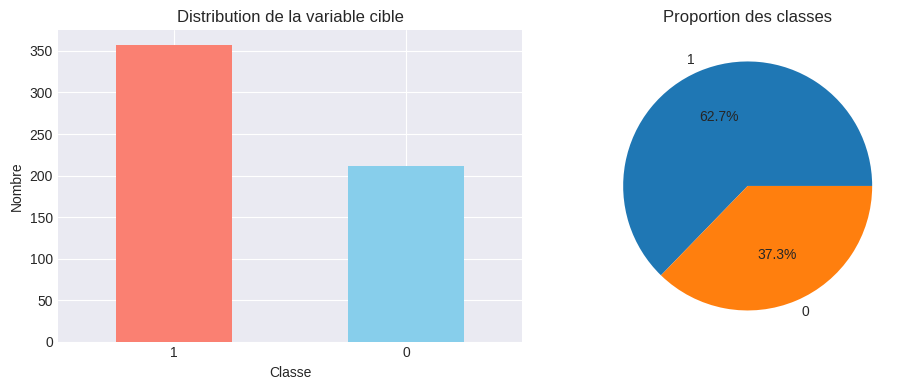

In [19]:
# =============================================================================
# 3. EXPLORATION DES DONNÉES (EDA)
# =============================================================================

print("\n📈 STATISTIQUES DESCRIPTIVES:")
print(df.describe())

print("\n🎯 DISTRIBUTION DE LA VARIABLE CIBLE:")
print(df['target'].value_counts())
print("\nProportions:")
print(df['target'].value_counts(normalize=True))

# Visualisation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['target'].value_counts().plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Distribution de la variable cible')
plt.xlabel('Classe')
plt.ylabel('Nombre')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion des classes')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [20]:
# =============================================================================
# 4. GESTION DES VALEURS MANQUANTES
# =============================================================================

print("\n🔍 DÉTECTION DES VALEURS MANQUANTES:")
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Colonne': missing_values.index,
    'Valeurs manquantes': missing_values.values,
    'Pourcentage (%)': missing_percent.values
})
missing_df = missing_df[missing_df['Valeurs manquantes'] > 0]

if len(missing_df) > 0:
    print("⚠️ Colonnes avec valeurs manquantes:")
    print(missing_df)
else:
    print("✅ Aucune valeur manquante!")

# Séparation X et y
X = df.drop('target', axis=1)
y = df['target']

# Imputation si nécessaire
if len(missing_df) > 0:
    numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
    imputer = SimpleImputer(strategy='mean')
    X[numerical_columns] = imputer.fit_transform(X[numerical_columns])
    print("\n✅ Valeurs manquantes traitées!")


🔍 DÉTECTION DES VALEURS MANQUANTES:
✅ Aucune valeur manquante!


In [21]:
# =============================================================================
# 5. ENCODAGE DES VARIABLES CATÉGORIELLES
# =============================================================================

categorical_columns = X.select_dtypes(include=['object', 'category']).columns
print(f"\n🏷️ Colonnes catégorielles: {len(categorical_columns)}")

if len(categorical_columns) > 0:
    print(f"Colonnes: {list(categorical_columns)}")
    X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
    print(f"✅ Encodage terminé! Nouvelles dimensions: {X.shape}")
else:
    print("✅ Aucune variable catégorielle!")


🏷️ Colonnes catégorielles: 0
✅ Aucune variable catégorielle!


In [22]:
# =============================================================================
# 6. SPLIT ET NORMALISATION DES DONNÉES
# =============================================================================

# Split train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

print(f"\n📊 Dimensions après split:")
print(f"   X_train: {X_train.shape}")
print(f"   X_test:  {X_test.shape}")
print(f"   y_train: {y_train.shape}")
print(f"   y_test:  {y_test.shape}")

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir en DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("\n✅ Normalisation terminée!")
print(f"   Moyenne des features (train): {X_train_scaled.mean().mean():.4f}")
print(f"   Écart-type des features (train): {X_train_scaled.std().mean():.4f}")


📊 Dimensions après split:
   X_train: (455, 30)
   X_test:  (114, 30)
   y_train: (455,)
   y_test:  (114,)

✅ Normalisation terminée!
   Moyenne des features (train): -0.0000
   Écart-type des features (train): 1.0011



🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲
MODÈLE RANDOM FOREST DE BASE
🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲

⏳ Entraînement du modèle...
✅ Modèle entraîné en 0.23 secondes

📊 PERFORMANCES DU MODÈLE DE BASE:

🎯 Sur les données de TEST:
   Accuracy:  0.9561
   Precision: 0.9561
   Recall:    0.9561
   F1-Score:  0.9560

🔄 Cross-Validation (5-fold):
   Score moyen: 0.9538 (+/- 0.0469)


<Figure size 800x600 with 0 Axes>

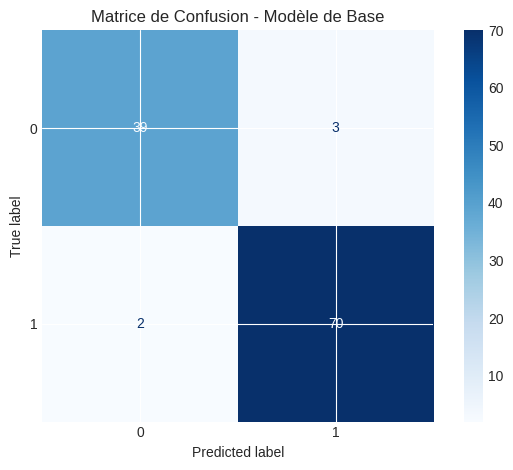


🎯 Top 10 Features importantes:
                 feature  importance
23            worst area      0.1400
27  worst concave points      0.1295
20          worst radius      0.0977
7    mean concave points      0.0909
22       worst perimeter      0.0722
2         mean perimeter      0.0696
0            mean radius      0.0687
6         mean concavity      0.0576
3              mean area      0.0492
26       worst concavity      0.0343


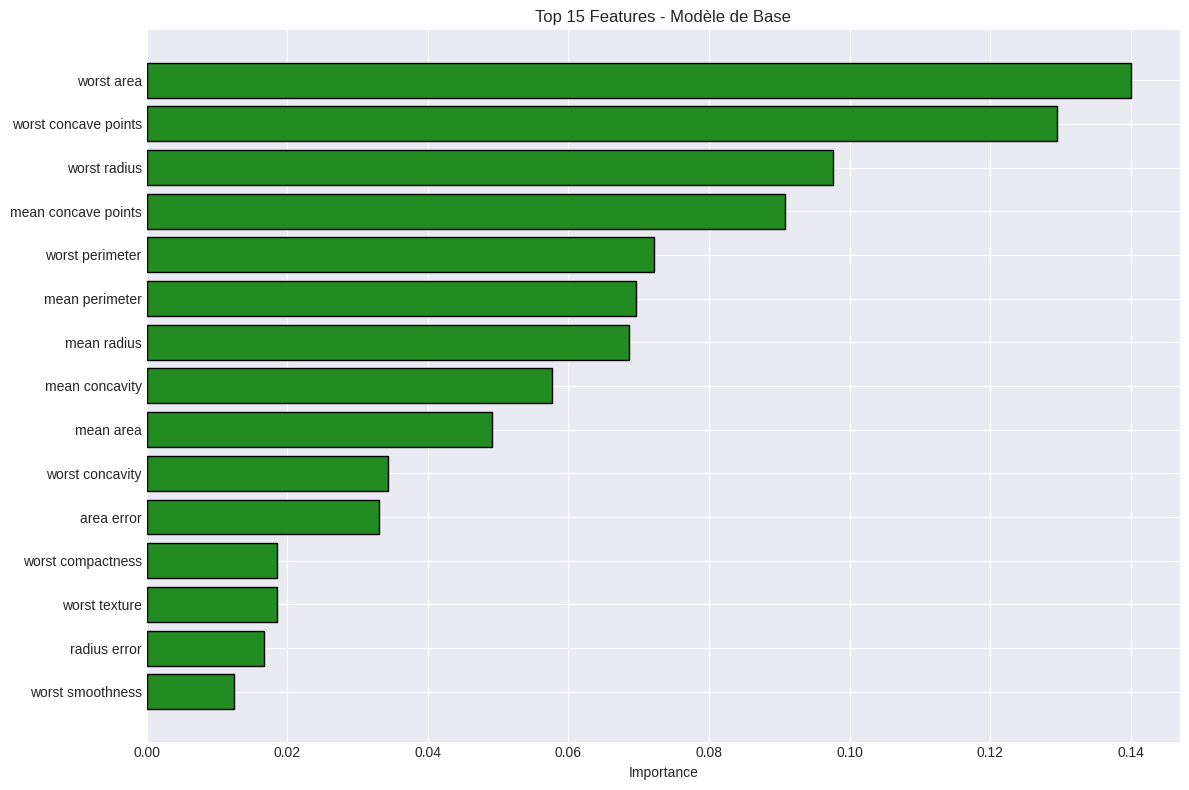

In [23]:
# =============================================================================
# 7. RANDOM FOREST - MODÈLE DE BASE
# =============================================================================

print("\n" + "🌲" * 40)
print("MODÈLE RANDOM FOREST DE BASE")
print("🌲" * 40)

# Création du modèle de base
rf_base = RandomForestClassifier(
    n_estimators=100,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

print("\n⏳ Entraînement du modèle...")
start_time = time.time()
rf_base.fit(X_train_scaled, y_train)
training_time = time.time() - start_time
print(f"✅ Modèle entraîné en {training_time:.2f} secondes")

# Prédictions
y_train_pred = rf_base.predict(X_train_scaled)
y_test_pred = rf_base.predict(X_test_scaled)
y_test_proba = rf_base.predict_proba(X_test_scaled)[:, 1]

# Évaluation
print("\n📊 PERFORMANCES DU MODÈLE DE BASE:")
print("=" * 80)
print(f"\n🎯 Sur les données de TEST:")
print(f"   Accuracy:  {accuracy_score(y_test, y_test_pred):.4f}")
print(f"   Precision: {precision_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"   Recall:    {recall_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"   F1-Score:  {f1_score(y_test, y_test_pred, average='weighted'):.4f}")

# Cross-validation
cv_scores = cross_val_score(rf_base, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(f"\n🔄 Cross-Validation (5-fold):")
print(f"   Score moyen: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Matrice de confusion
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_base.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matrice de Confusion - Modèle de Base')
plt.tight_layout()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': rf_base.feature_importances_
}).sort_values('importance', ascending=False)

print("\n🎯 Top 10 Features importantes:")
print(feature_importance.head(10))

plt.figure(figsize=(12, 8))
plt.barh(feature_importance['feature'][:15][::-1],
         feature_importance['importance'][:15][::-1],
         color='forestgreen', edgecolor='black')
plt.xlabel('Importance')
plt.title('Top 15 Features - Modèle de Base')
plt.tight_layout()
plt.show()

In [25]:
# =============================================================================
# 8. OPTIMISATION DES HYPERPARAMÈTRES
# =============================================================================

print("\n" + "🔧" * 40)
print("OPTIMISATION DES HYPERPARAMÈTRES")
print("🔧" * 40)

# Grille de paramètres
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['sqrt', 'log2', None]
}

# RandomizedSearchCV (plus rapide)
rf_random = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=rf_random,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=RANDOM_STATE
)

print("\n⏳ Recherche des meilleurs hyperparamètres...")
start_time = time.time()
random_search.fit(X_train_scaled, y_train)
search_time = time.time() - start_time

print(f"\n✅ Recherche terminée en {search_time/60:.2f} minutes")
print(f"\n🏆 MEILLEURS PARAMÈTRES:")
print(random_search.best_params_)
print(f"\n📊 Meilleur score CV: {random_search.best_score_:.4f}")

# ⭐ IMPORTANT: Sauvegarder le modèle optimisé
rf_optimized = random_search.best_estimator_

# Évaluation du modèle optimisé
y_test_pred_opt = rf_optimized.predict(X_test_scaled)

print("\n📊 PERFORMANCES DU MODÈLE OPTIMISÉ:")
print(f"   Accuracy:  {accuracy_score(y_test, y_test_pred_opt):.4f}")
print(f"   Precision: {precision_score(y_test, y_test_pred_opt, average='weighted'):.4f}")
print(f"   Recall:    {recall_score(y_test, y_test_pred_opt, average='weighted'):.4f}")
print(f"   F1-Score:  {f1_score(y_test, y_test_pred_opt, average='weighted'):.4f}")

# Comparaison
comparison = pd.DataFrame({
    'Métrique': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Modèle Base': [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, average='weighted'),
        recall_score(y_test, y_test_pred, average='weighted'),
        f1_score(y_test, y_test_pred, average='weighted')
    ],
    'Modèle Optimisé': [
        accuracy_score(y_test, y_test_pred_opt),
        precision_score(y_test, y_test_pred_opt, average='weighted'),
        recall_score(y_test, y_test_pred_opt, average='weighted'),
        f1_score(y_test, y_test_pred_opt, average='weighted')
    ]
})

print("\n📊 COMPARAISON BASE vs OPTIMISÉ:")
print(comparison.to_string(index=False))


🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧
OPTIMISATION DES HYPERPARAMÈTRES
🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧

⏳ Recherche des meilleurs hyperparamètres...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

✅ Recherche terminée en 2.97 minutes

🏆 MEILLEURS PARAMÈTRES:
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}

📊 Meilleur score CV: 0.9604

📊 PERFORMANCES DU MODÈLE OPTIMISÉ:
   Accuracy:  0.9561
   Precision: 0.9561
   Recall:    0.9561
   F1-Score:  0.9560

📊 COMPARAISON BASE vs OPTIMISÉ:
 Métrique  Modèle Base  Modèle Optimisé
 Accuracy       0.9561           0.9561
Precision       0.9561           0.9561
   Recall       0.9561           0.9561
 F1-Score       0.9560           0.9560



🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳
VISUALISATION D'UN ARBRE DE DÉCISION
🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳

✅ Utilisation du modèle optimisé


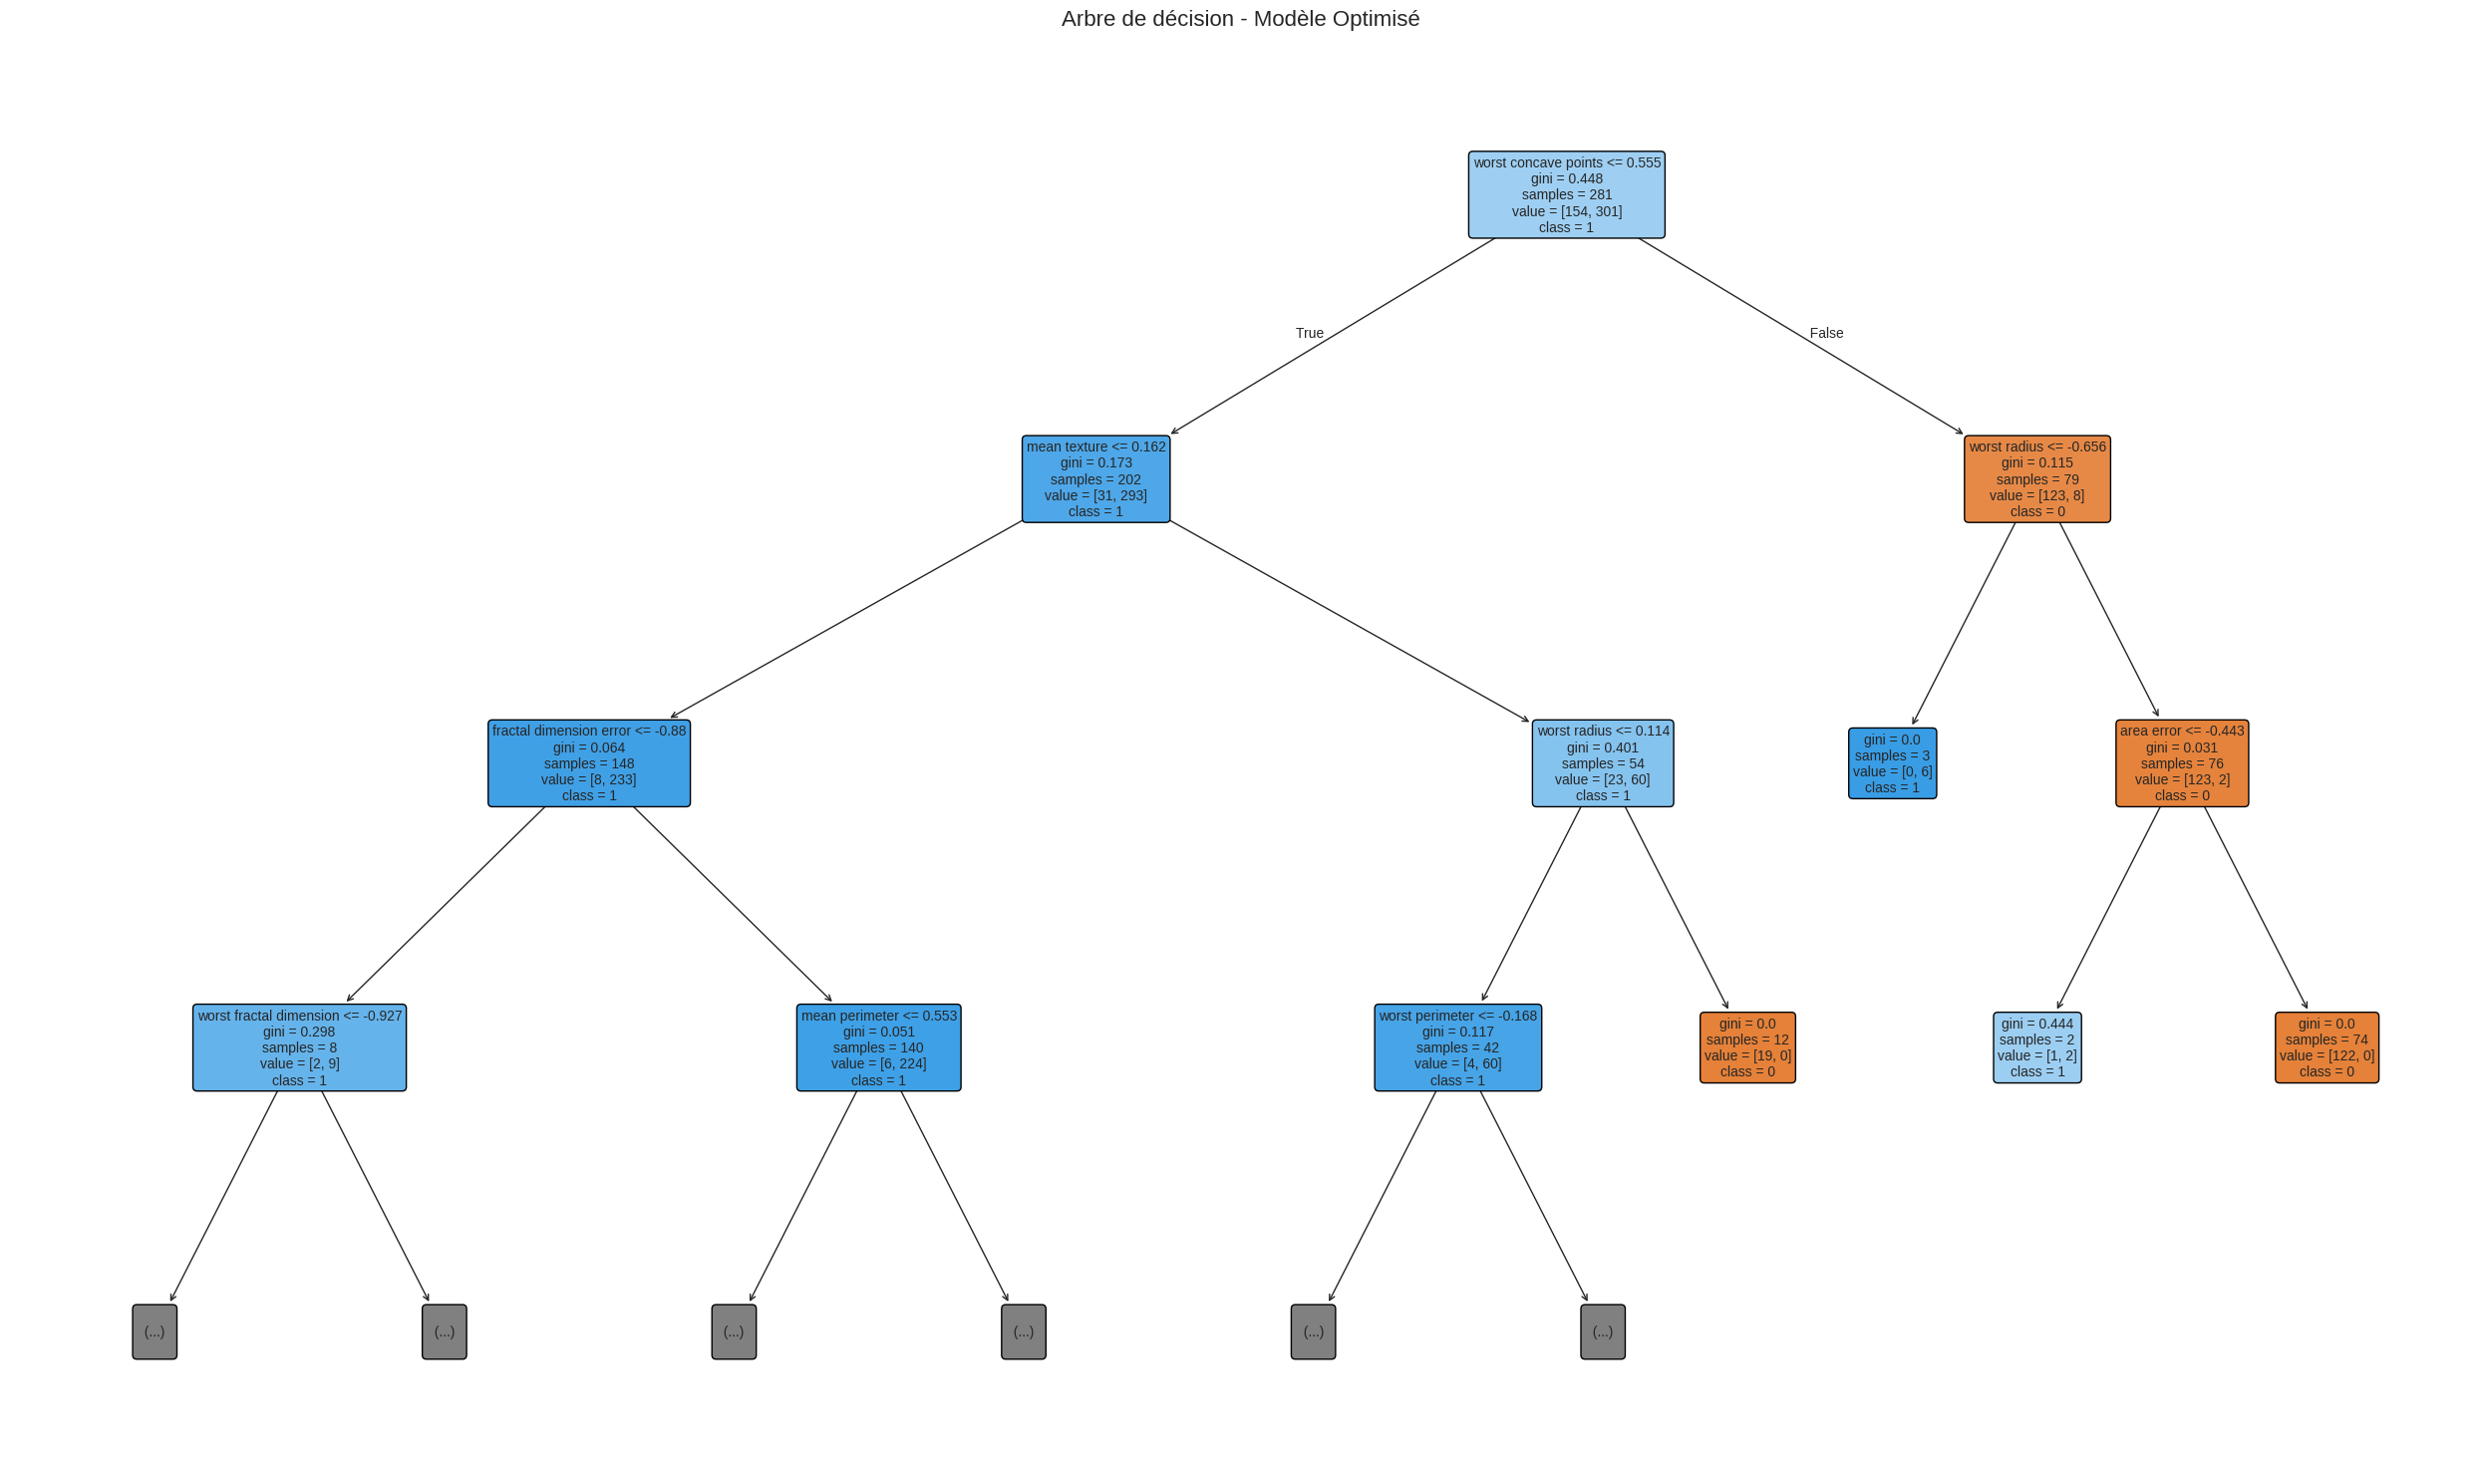


✅ Arbre sauvegardé: decision_tree_visualization.png


In [27]:
# =============================================================================
# 9. VISUALISATION D'UN ARBRE DE DÉCISION
# =============================================================================

print("\n" + "🌳" * 40)
print("VISUALISATION D'UN ARBRE DE DÉCISION")
print("🌳" * 40)

# ⭐ Vérifier quel modèle utiliser (avec gestion d'erreur)
if 'rf_optimized' in locals() or 'rf_optimized' in globals():
    model_to_visualize = rf_optimized
    model_name = "Modèle Optimisé"
    print("\n✅ Utilisation du modèle optimisé")
elif 'rf_base' in locals() or 'rf_base' in globals():
    model_to_visualize = rf_base
    model_name = "Modèle de Base"
    print("\n⚠️ Utilisation du modèle de base")
else:
    print("\n❌ Aucun modèle trouvé!")
    raise ValueError("Veuillez d'abord entraîner un modèle (cellules 7 ou 8)")

# Visualisation
plt.figure(figsize=(25, 15))
plot_tree(
    model_to_visualize.estimators_[0],
    feature_names=X_train_scaled.columns,
    class_names=[str(c) for c in model_to_visualize.classes_],
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3
)
plt.title(f"Arbre de décision - {model_name}", fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('decision_tree_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✅ Arbre sauvegardé: decision_tree_visualization.png")


🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
TECHNIQUE 1: SÉLECTION DES FEATURES IMPORTANTES
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯

📊 Méthode 1: Importance du Random Forest

🔝 Top 20 features les plus importantes:
                 feature  importance
23            worst area      0.1259
22       worst perimeter      0.1200
27  worst concave points      0.1173
20          worst radius      0.0855
7    mean concave points      0.0747
0            mean radius      0.0575
2         mean perimeter      0.0562
6         mean concavity      0.0550
3              mean area      0.0510
13            area error      0.0428
26       worst concavity      0.0366
25     worst compactness      0.0190
21         worst texture      0.0188
5       mean compactness      0.0171
10          radius error      0.0161
24      worst smoothness      0.0135
1           mean texture      0.0128
12       perimeter error      0.0118
28        worst symmetry      0.0113
16       concavity error      0.0104


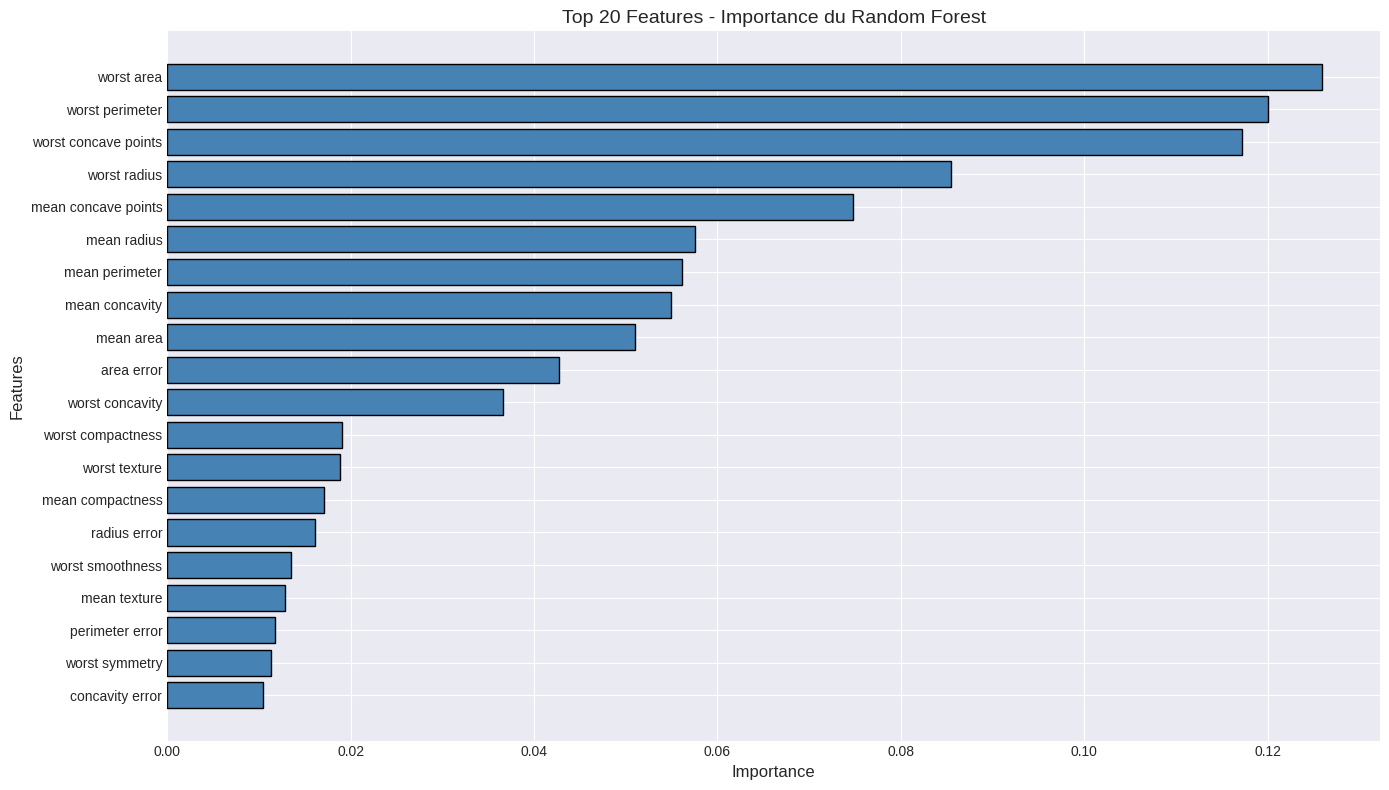


🎯 Seuil d'importance (percentile 50): 0.014808

📊 Nombre de features sélectionnées: 15 / 30
   Réduction: 50.0%

✅ Nouvelles dimensions:
   X_train_selected: (455, 15)
   X_test_selected:  (114, 15)

🌲 Entraînement du modèle avec Feature Selection...
✅ Modèle entraîné en 1.03 secondes

📊 PERFORMANCES avec Feature Selection:
   Accuracy:  0.9561
   Precision: 0.9561
   Recall:    0.9561
   F1-Score:  0.9560

📊 COMPARAISON: Modèle Optimisé vs Feature Selection


   Métrique  Modèle Optimisé  Feature Selection
   Accuracy           0.9561             0.9561
  Precision           0.9561             0.9561
     Recall           0.9561             0.9561
   F1-Score           0.9560             0.9560
  Temps (s)           1.0309             1.0309
Nb Features          30.0000            15.0000


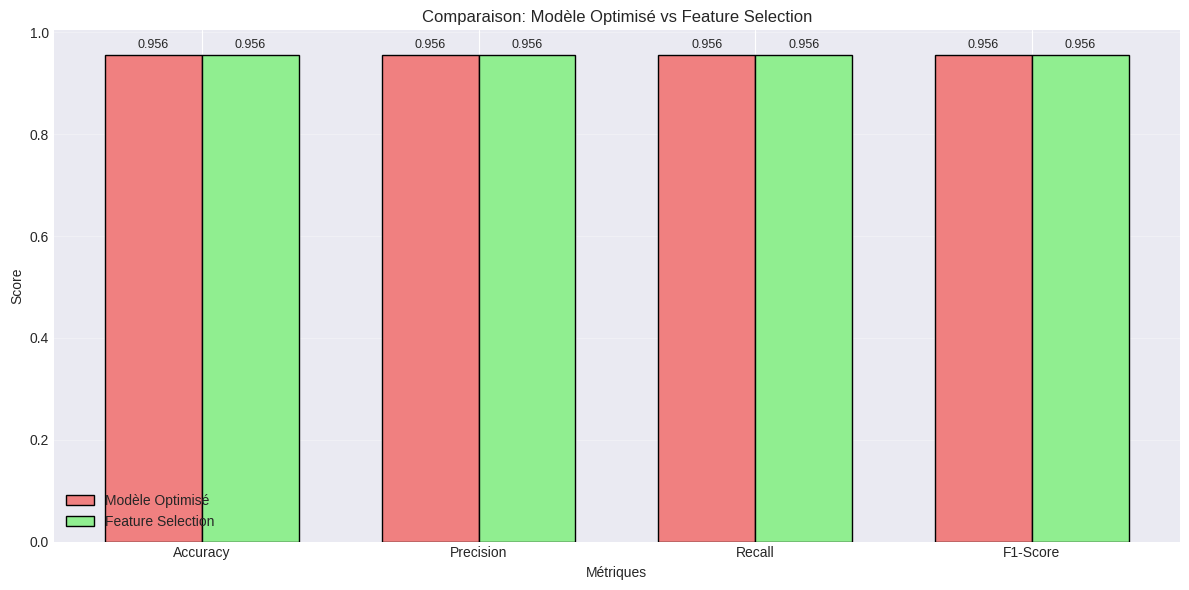


✅ TECHNIQUE 1 terminée!


In [29]:
# =============================================================================
# 10.1 TECHNIQUE 1: FEATURE SELECTION
# =============================================================================

print("\n" + "🎯" * 40)
print("TECHNIQUE 1: SÉLECTION DES FEATURES IMPORTANTES")
print("🎯" * 40)

# =============================================================================
# Méthode 1: Sélection basée sur l'importance du Random Forest
# =============================================================================

print("\n📊 Méthode 1: Importance du Random Forest")
print("=" * 80)

# Récupérer les importances du modèle optimisé
feature_importance_opt = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': rf_optimized.feature_importances_
}).sort_values('importance', ascending=False)

print("\n🔝 Top 20 features les plus importantes:")
print(feature_importance_opt.head(20))

# Visualisation
plt.figure(figsize=(14, 8))
top_n = 20
plt.barh(
    feature_importance_opt['feature'][:top_n][::-1],
    feature_importance_opt['importance'][:top_n][::-1],
    color='steelblue',
    edgecolor='black'
)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title(f'Top {top_n} Features - Importance du Random Forest', fontsize=14)
plt.tight_layout()
plt.savefig('feature_importance_optimized.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# Sélectionner les top N features
# =============================================================================

# Définir le seuil (garder les features avec importance > percentile)
threshold_percentile = 50  # Garder les 50% meilleures features
importance_threshold = np.percentile(rf_optimized.feature_importances_, threshold_percentile)

print(f"\n🎯 Seuil d'importance (percentile {threshold_percentile}): {importance_threshold:.6f}")

# Sélectionner les features
selected_features_mask = rf_optimized.feature_importances_ > importance_threshold
selected_features = X_train_scaled.columns[selected_features_mask]

print(f"\n📊 Nombre de features sélectionnées: {len(selected_features)} / {len(X_train_scaled.columns)}")
print(f"   Réduction: {(1 - len(selected_features)/len(X_train_scaled.columns))*100:.1f}%")

# Créer les nouveaux datasets avec features sélectionnées
X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

print(f"\n✅ Nouvelles dimensions:")
print(f"   X_train_selected: {X_train_selected.shape}")
print(f"   X_test_selected:  {X_test_selected.shape}")

# =============================================================================
# Entraîner un modèle avec les features sélectionnées
# =============================================================================

print("\n🌲 Entraînement du modèle avec Feature Selection...")

rf_feature_selected = RandomForestClassifier(
    **rf_optimized.get_params()  # Les paramètres incluent déjà random_state
)

start_time = time.time()
rf_feature_selected.fit(X_train_selected, y_train)
training_time = time.time() - start_time

print(f"✅ Modèle entraîné en {training_time:.2f} secondes")

# Prédictions
y_pred_fs = rf_feature_selected.predict(X_test_selected)

# Évaluation
print("\n📊 PERFORMANCES avec Feature Selection:")
print("=" * 80)
print(f"   Accuracy:  {accuracy_score(y_test, y_pred_fs):.4f}")
print(f"   Precision: {precision_score(y_test, y_pred_fs, average='weighted'):.4f}")
print(f"   Recall:    {recall_score(y_test, y_pred_fs, average='weighted'):.4f}")
print(f"   F1-Score:  {f1_score(y_test, y_pred_fs, average='weighted'):.4f}")

# Comparaison
print("\n📊 COMPARAISON: Modèle Optimisé vs Feature Selection")
print("=" * 80)

comparison_fs = pd.DataFrame({
    'Métrique': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Temps (s)', 'Nb Features'],
    'Modèle Optimisé': [
        accuracy_score(y_test, y_test_pred_opt),
        precision_score(y_test, y_test_pred_opt, average='weighted'),
        recall_score(y_test, y_test_pred_opt, average='weighted'),
        f1_score(y_test, y_test_pred_opt, average='weighted'),
        training_time,  # Approximatif
        len(X_train_scaled.columns)
    ],
    'Feature Selection': [
        accuracy_score(y_test, y_pred_fs),
        precision_score(y_test, y_pred_fs, average='weighted'),
        recall_score(y_test, y_pred_fs, average='weighted'),
        f1_score(y_test, y_pred_fs, average='weighted'),
        training_time,
        len(selected_features)
    ]
})

print("\n")
print(comparison_fs.to_string(index=False))

# Visualisation
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(4)  # 4 métriques
width = 0.35

metrics_opt = comparison_fs['Modèle Optimisé'][:4]
metrics_fs = comparison_fs['Feature Selection'][:4]

bars1 = ax.bar(x - width/2, metrics_opt, width, label='Modèle Optimisé', color='lightcoral', edgecolor='black')
bars2 = ax.bar(x + width/2, metrics_fs, width, label='Feature Selection', color='lightgreen', edgecolor='black')

ax.set_xlabel('Métriques')
ax.set_ylabel('Score')
ax.set_title('Comparaison: Modèle Optimisé vs Feature Selection')
ax.set_xticks(x)
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-Score'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9)

plt.tight_layout()
plt.savefig('comparison_feature_selection.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ TECHNIQUE 1 terminée!")


🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝
TECHNIQUE 2: ENSEMBLE AVEC GRADIENT BOOSTING
🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝🤝

🌳 Entraînement du Gradient Boosting...
✅ Gradient Boosting entraîné en 3.13 secondes

📊 PERFORMANCES du Gradient Boosting seul:
   Accuracy:  0.9298
   Precision: 0.9311
   Recall:    0.9298
   F1-Score:  0.9301

🤝 Création de l'ensemble (Voting Classifier)...
✅ Ensemble créé en 6.25 secondes

📊 PERFORMANCES de l'Ensemble (RF + GB):
   Accuracy:  0.9298
   Precision: 0.9311
   Recall:    0.9298
   F1-Score:  0.9301

📊 COMPARAISON: RF vs GB vs Ensemble


 Métrique  Random Forest  Gradient Boosting  Ensemble (RF+GB)
 Accuracy         0.9561             0.9298            0.9298
Precision         0.9561             0.9311            0.9311
   Recall         0.9561             0.9298            0.9298
 F1-Score         0.9560             0.9301            0.9301


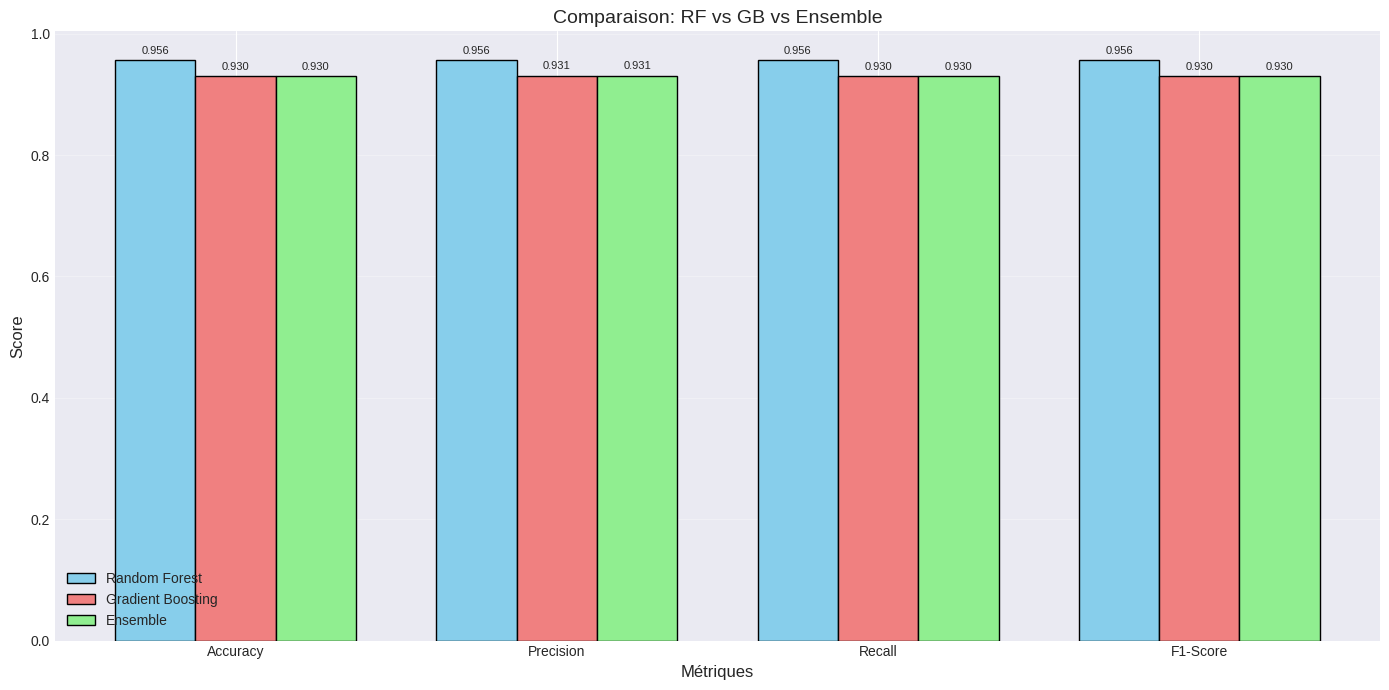


✅ TECHNIQUE 2 terminée!


In [30]:
# =============================================================================
# 10.2 TECHNIQUE 2: ENSEMBLE AVEC GRADIENT BOOSTING
# =============================================================================

print("\n" + "🤝" * 40)
print("TECHNIQUE 2: ENSEMBLE AVEC GRADIENT BOOSTING")
print("🤝" * 40)

from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

# =============================================================================
# Entraîner un modèle Gradient Boosting
# =============================================================================

print("\n🌳 Entraînement du Gradient Boosting...")

gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=RANDOM_STATE
)

start_time = time.time()
gb_model.fit(X_train_scaled, y_train)
gb_time = time.time() - start_time

print(f"✅ Gradient Boosting entraîné en {gb_time:.2f} secondes")

# Prédictions GB seul
y_pred_gb = gb_model.predict(X_test_scaled)

print("\n📊 PERFORMANCES du Gradient Boosting seul:")
print("=" * 80)
print(f"   Accuracy:  {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"   Precision: {precision_score(y_test, y_pred_gb, average='weighted'):.4f}")
print(f"   Recall:    {recall_score(y_test, y_pred_gb, average='weighted'):.4f}")
print(f"   F1-Score:  {f1_score(y_test, y_pred_gb, average='weighted'):.4f}")

# =============================================================================
# Créer un ensemble avec Voting Classifier
# =============================================================================

print("\n🤝 Création de l'ensemble (Voting Classifier)...")

# Voting Classifier: combine RF et GB
ensemble_model = VotingClassifier(
    estimators=[
        ('random_forest', rf_optimized),
        ('gradient_boosting', gb_model)
    ],
    voting='soft',  # 'soft' utilise les probabilités, 'hard' utilise les votes majoritaires
    n_jobs=-1
)

start_time = time.time()
ensemble_model.fit(X_train_scaled, y_train)
ensemble_time = time.time() - start_time

print(f"✅ Ensemble créé en {ensemble_time:.2f} secondes")

# Prédictions de l'ensemble
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

print("\n📊 PERFORMANCES de l'Ensemble (RF + GB):")
print("=" * 80)
print(f"   Accuracy:  {accuracy_score(y_test, y_pred_ensemble):.4f}")
print(f"   Precision: {precision_score(y_test, y_pred_ensemble, average='weighted'):.4f}")
print(f"   Recall:    {recall_score(y_test, y_pred_ensemble, average='weighted'):.4f}")
print(f"   F1-Score:  {f1_score(y_test, y_pred_ensemble, average='weighted'):.4f}")

# =============================================================================
# Comparaison des 3 modèles
# =============================================================================

print("\n📊 COMPARAISON: RF vs GB vs Ensemble")
print("=" * 80)

comparison_ensemble = pd.DataFrame({
    'Métrique': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Random Forest': [
        accuracy_score(y_test, y_test_pred_opt),
        precision_score(y_test, y_test_pred_opt, average='weighted'),
        recall_score(y_test, y_test_pred_opt, average='weighted'),
        f1_score(y_test, y_test_pred_opt, average='weighted')
    ],
    'Gradient Boosting': [
        accuracy_score(y_test, y_pred_gb),
        precision_score(y_test, y_pred_gb, average='weighted'),
        recall_score(y_test, y_pred_gb, average='weighted'),
        f1_score(y_test, y_pred_gb, average='weighted')
    ],
    'Ensemble (RF+GB)': [
        accuracy_score(y_test, y_pred_ensemble),
        precision_score(y_test, y_pred_ensemble, average='weighted'),
        recall_score(y_test, y_pred_ensemble, average='weighted'),
        f1_score(y_test, y_pred_ensemble, average='weighted')
    ]
})

print("\n")
print(comparison_ensemble.to_string(index=False))

# Visualisation
fig, ax = plt.subplots(figsize=(14, 7))
x = np.arange(len(comparison_ensemble))
width = 0.25

bars1 = ax.bar(x - width, comparison_ensemble['Random Forest'], width,
               label='Random Forest', color='skyblue', edgecolor='black')
bars2 = ax.bar(x, comparison_ensemble['Gradient Boosting'], width,
               label='Gradient Boosting', color='lightcoral', edgecolor='black')
bars3 = ax.bar(x + width, comparison_ensemble['Ensemble (RF+GB)'], width,
               label='Ensemble', color='lightgreen', edgecolor='black')

ax.set_xlabel('Métriques', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Comparaison: RF vs GB vs Ensemble', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(comparison_ensemble['Métrique'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

plt.tight_layout()
plt.savefig('comparison_ensemble.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ TECHNIQUE 2 terminée!")


⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️
TECHNIQUE 3: GESTION DU DÉSÉQUILIBRE DES CLASSES
⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️

📊 Distribution des classes:

Classes dans le train set:
target
1    285
0    170
Name: count, dtype: int64

Proportions:
target
1   0.6264
0   0.3736
Name: proportion, dtype: float64

⚖️ Ratio de déséquilibre: 1.68:1
⚠️ Les classes sont déséquilibrées!

🔄 Application de SMOTE...

📊 Dimensions APRÈS SMOTE:
   AVANT: X_train = (455, 30), y_train = (455,)
   APRÈS: X_train = (570, 30), y_train = (570,)

📊 Distribution APRÈS SMOTE:
target
1    285
0    285
Name: count, dtype: int64

Proportions:
target
1   0.5000
0   0.5000
Name: proportion, dtype: float64


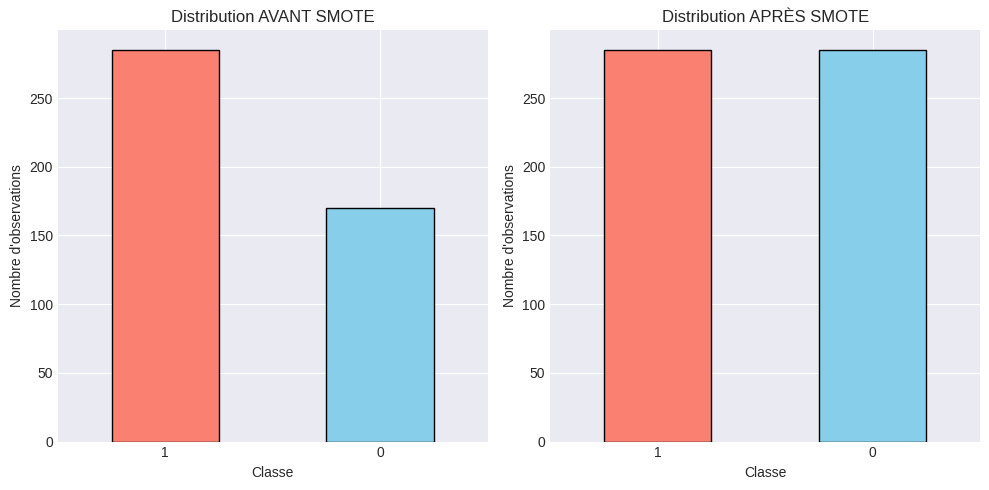


🌲 Entraînement du modèle avec données équilibrées (SMOTE)...
✅ Modèle avec SMOTE entraîné en 3.66 secondes

📊 PERFORMANCES avec SMOTE:
   Accuracy:  0.9298
   Precision: 0.9311
   Recall:    0.9298
   F1-Score:  0.9301

📋 Rapport de classification (SMOTE):
              precision    recall  f1-score   support

    Classe 0       0.89      0.93      0.91        42
    Classe 1       0.96      0.93      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114


📊 COMPARAISON: Sans SMOTE vs Avec SMOTE


 Métrique  Sans SMOTE  Avec SMOTE
 Accuracy      0.9561      0.9298
Precision      0.9561      0.9311
   Recall      0.9561      0.9298
 F1-Score      0.9560      0.9301


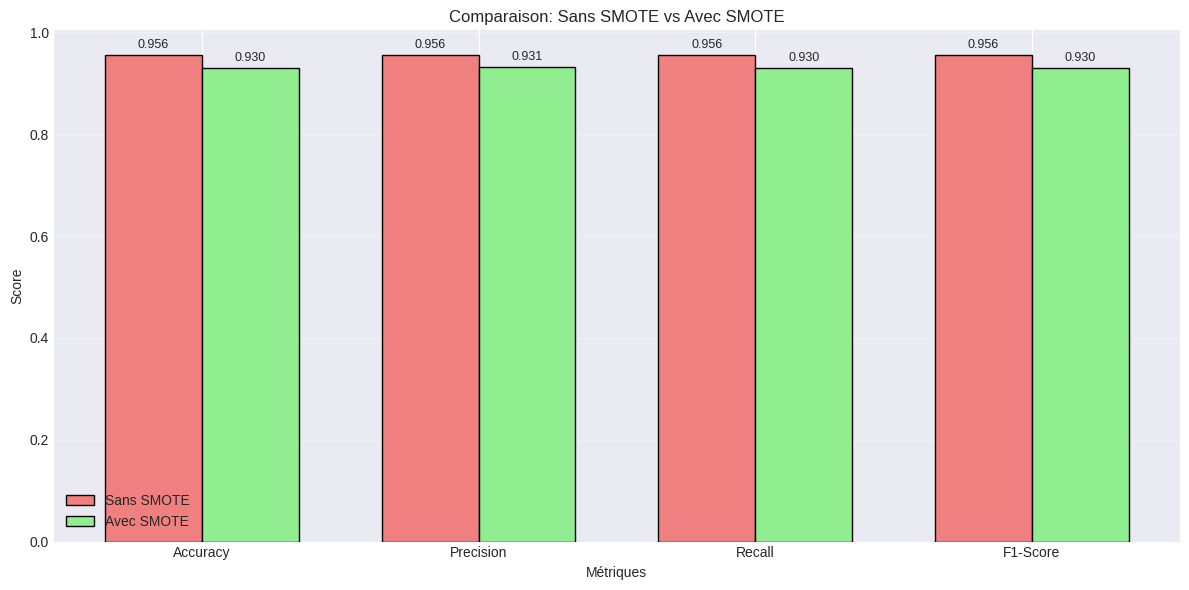


✅ TECHNIQUE 3 terminée!


In [32]:
# =============================================================================
# 10.3 TECHNIQUE 3: GESTION DU DÉSÉQUILIBRE DES CLASSES
# =============================================================================

print("\n" + "⚖️" * 40)
print("TECHNIQUE 3: GESTION DU DÉSÉQUILIBRE DES CLASSES")
print("⚖️" * 40)

# =============================================================================
# Vérifier le déséquilibre
# =============================================================================

print("\n📊 Distribution des classes:")
print("=" * 80)

class_distribution = y_train.value_counts()
print(f"\nClasses dans le train set:")
print(class_distribution)
print(f"\nProportions:")
print(y_train.value_counts(normalize=True))

# Calculer le ratio de déséquilibre
imbalance_ratio = class_distribution.max() / class_distribution.min()
print(f"\n⚖️ Ratio de déséquilibre: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 1.5:
    print("⚠️ Les classes sont déséquilibrées!")
else:
    print("✅ Les classes sont relativement équilibrées")

# Visualisation
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Distribution AVANT SMOTE')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'observations')
plt.xticks(rotation=0)

# =============================================================================
# Appliquer SMOTE (Synthetic Minority Over-sampling Technique)
# =============================================================================

from imblearn.over_sampling import SMOTE

print("\n🔄 Application de SMOTE...")

smote = SMOTE(random_state=RANDOM_STATE)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"\n📊 Dimensions APRÈS SMOTE:")
print(f"   AVANT: X_train = {X_train_scaled.shape}, y_train = {y_train.shape}")
print(f"   APRÈS: X_train = {X_train_smote.shape}, y_train = {y_train_smote.shape}")

print(f"\n📊 Distribution APRÈS SMOTE:")
print(pd.Series(y_train_smote).value_counts())
print(f"\nProportions:")
print(pd.Series(y_train_smote).value_counts(normalize=True))

# Visualisation après SMOTE
plt.subplot(1, 2, 2)
pd.Series(y_train_smote).value_counts().plot(kind='bar', color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Distribution APRÈS SMOTE')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'observations')
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('smote_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# Entraîner le modèle avec SMOTE
# =============================================================================

print("\n🌲 Entraînement du modèle avec données équilibrées (SMOTE)...")

rf_smote = RandomForestClassifier(
    **rf_optimized.get_params()
)

start_time = time.time()
rf_smote.fit(X_train_smote, y_train_smote)
smote_time = time.time() - start_time

print(f"✅ Modèle avec SMOTE entraîné en {smote_time:.2f} secondes")

# Prédictions
y_pred_smote = rf_smote.predict(X_test_scaled)

print("\n📊 PERFORMANCES avec SMOTE:")
print("=" * 80)
print(f"   Accuracy:  {accuracy_score(y_test, y_pred_smote):.4f}")
print(f"   Precision: {precision_score(y_test, y_pred_smote, average='weighted'):.4f}")
print(f"   Recall:    {recall_score(y_test, y_pred_smote, average='weighted'):.4f}")
print(f"   F1-Score:  {f1_score(y_test, y_pred_smote, average='weighted'):.4f}")

# Rapport de classification détaillé
print("\n📋 Rapport de classification (SMOTE):")
print(classification_report(y_test, y_pred_smote, target_names=[f'Classe {i}' for i in rf_smote.classes_]))

# =============================================================================
# Comparaison AVEC et SANS SMOTE
# =============================================================================

print("\n📊 COMPARAISON: Sans SMOTE vs Avec SMOTE")
print("=" * 80)

comparison_smote = pd.DataFrame({
    'Métrique': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Sans SMOTE': [
        accuracy_score(y_test, y_test_pred_opt),
        precision_score(y_test, y_test_pred_opt, average='weighted'),
        recall_score(y_test, y_test_pred_opt, average='weighted'),
        f1_score(y_test, y_test_pred_opt, average='weighted')
    ],
    'Avec SMOTE': [
        accuracy_score(y_test, y_pred_smote),
        precision_score(y_test, y_pred_smote, average='weighted'),
        recall_score(y_test, y_pred_smote, average='weighted'),
        f1_score(y_test, y_pred_smote, average='weighted')
    ]
})

print("\n")
print(comparison_smote.to_string(index=False))

# Visualisation
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(comparison_smote))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_smote['Sans SMOTE'], width,
               label='Sans SMOTE', color='lightcoral', edgecolor='black')
bars2 = ax.bar(x + width/2, comparison_smote['Avec SMOTE'], width,
               label='Avec SMOTE', color='lightgreen', edgecolor='black')

ax.set_xlabel('Métriques')
ax.set_ylabel('Score')
ax.set_title('Comparaison: Sans SMOTE vs Avec SMOTE')
ax.set_xticks(x)
ax.set_xticklabels(comparison_smote['Métrique'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9)

plt.tight_layout()
plt.savefig('comparison_smote.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ TECHNIQUE 3 terminée!")


🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧
TECHNIQUE 4: FEATURE ENGINEERING
🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧🔧

⚠️ Note: Le Feature Engineering dépend fortement du dataset.
Les exemples ci-dessous sont génériques. Adaptez-les à votre dataset spécifique.


🔨 Création de nouvelles features...

1️⃣ Création d'interactions entre features...
   Top 2 features: ['worst area', 'worst perimeter']
   ✅ Feature créée: worst area_x_worst perimeter

2️⃣ Création de features statistiques...
   ✅ Feature créée: mean_all_features
   ✅ Feature créée: std_all_features
   ✅ Feature créée: max_all_features
   ✅ Feature créée: min_all_features

3️⃣ Création de ratios entre features...
   ✅ Feature créée: worst area_div_worst perimeter

4️⃣ Création de features binaires...
   ✅ Feature créée: worst area_above_median

📊 Nouvelles dimensions après Feature Engineering:
   AVANT: (455, 30)
   APRÈS: (455, 37)
   Features ajoutées: 7

🌲 Entraînement du modèle avec Feature Engineering...
✅ Modèle avec FE en

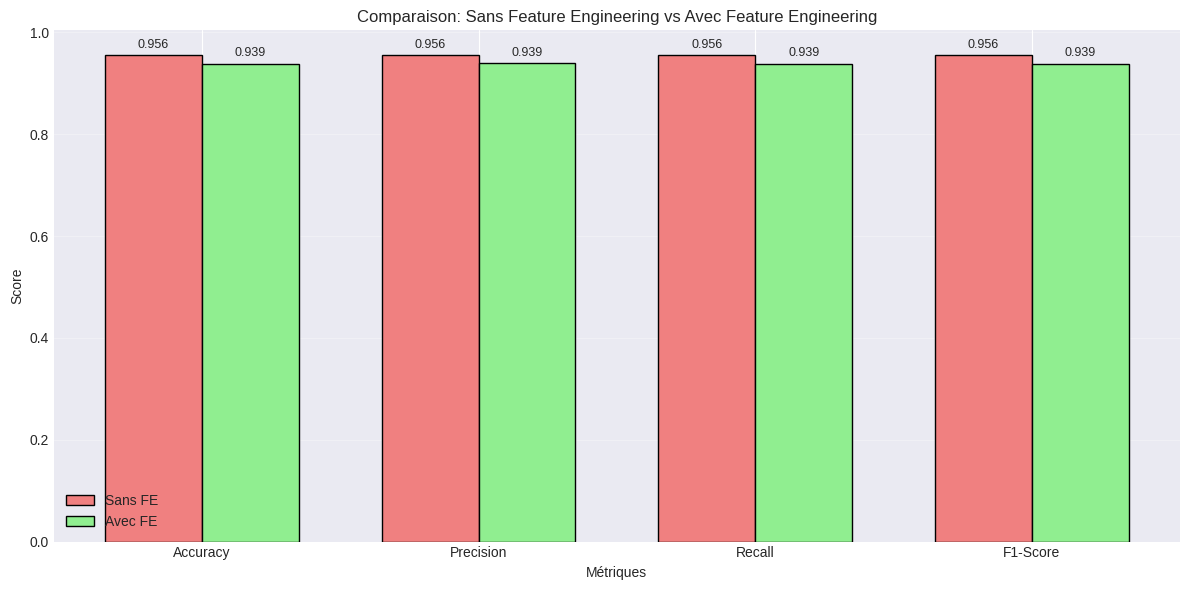


✅ TECHNIQUE 4 terminée!


In [34]:
# =============================================================================
# 10.4 TECHNIQUE 4: FEATURE ENGINEERING
# =============================================================================

print("\n" + "🔧" * 40)
print("TECHNIQUE 4: FEATURE ENGINEERING")
print("🔧" * 40)

print("""
⚠️ Note: Le Feature Engineering dépend fortement du dataset.
Les exemples ci-dessous sont génériques. Adaptez-les à votre dataset spécifique.
""")

# =============================================================================
# Créer de nouvelles features
# =============================================================================

print("\n🔨 Création de nouvelles features...")

# Copier les données pour ne pas modifier les originales
X_train_fe = X_train_scaled.copy()
X_test_fe = X_test_scaled.copy()

# ----------------------------------------------
# Feature Engineering - Exemples génériques
# ----------------------------------------------

# 1. Interactions polynomiales (produits de features)
print("\n1️⃣ Création d'interactions entre features...")

# Exemple: Multiplier les 2 features les plus importantes
top_2_features = feature_importance_opt['feature'][:2].tolist()
print(f"   Top 2 features: {top_2_features}")

if len(top_2_features) == 2:
    new_feature_name = f"{top_2_features[0]}_x_{top_2_features[1]}"
    X_train_fe[new_feature_name] = X_train_fe[top_2_features[0]] * X_train_fe[top_2_features[1]]
    X_test_fe[new_feature_name] = X_test_fe[top_2_features[0]] * X_test_fe[top_2_features[1]]
    print(f"   ✅ Feature créée: {new_feature_name}")

# 2. Features statistiques (agrégations)
print("\n2️⃣ Création de features statistiques...")

# Moyenne de toutes les features
X_train_fe['mean_all_features'] = X_train_fe.mean(axis=1)
X_test_fe['mean_all_features'] = X_test_fe.mean(axis=1)
print("   ✅ Feature créée: mean_all_features")

# Écart-type de toutes les features
X_train_fe['std_all_features'] = X_train_fe.std(axis=1)
X_test_fe['std_all_features'] = X_test_fe.std(axis=1)
print("   ✅ Feature créée: std_all_features")

# Maximum de toutes les features
X_train_fe['max_all_features'] = X_train_fe.max(axis=1)
X_test_fe['max_all_features'] = X_test_fe.max(axis=1)
print("   ✅ Feature créée: max_all_features")

# Minimum de toutes les features
X_train_fe['min_all_features'] = X_train_fe.min(axis=1)
X_test_fe['min_all_features'] = X_test_fe.min(axis=1)
print("   ✅ Feature créée: min_all_features")

# 3. Ratios entre features importantes
print("\n3️⃣ Création de ratios entre features...")

top_4_features = feature_importance_opt['feature'][:4].tolist()
if len(top_4_features) >= 2:
    ratio_name = f"{top_4_features[0]}_div_{top_4_features[1]}"
    # Éviter la division par zéro
    X_train_fe[ratio_name] = X_train_fe[top_4_features[0]] / (X_train_fe[top_4_features[1]] + 1e-10)
    X_test_fe[ratio_name] = X_test_fe[top_4_features[0]] / (X_test_fe[top_4_features[1]] + 1e-10)
    print(f"   ✅ Feature créée: {ratio_name}")

# 4. Features binaires (seuils)
print("\n4️⃣ Création de features binaires...")

# Exemple: Feature binaire basée sur la médiane de la feature la plus importante
top_feature = feature_importance_opt['feature'].iloc[0]
median_value = X_train_fe[top_feature].median()

X_train_fe[f'{top_feature}_above_median'] = (X_train_fe[top_feature] > median_value).astype(int)
X_test_fe[f'{top_feature}_above_median'] = (X_test_fe[top_feature] > median_value).astype(int)
print(f"   ✅ Feature créée: {top_feature}_above_median")

print(f"\n📊 Nouvelles dimensions après Feature Engineering:")
print(f"   AVANT: {X_train_scaled.shape}")
print(f"   APRÈS: {X_train_fe.shape}")
print(f"   Features ajoutées: {X_train_fe.shape[1] - X_train_scaled.shape[1]}")

# =============================================================================
# Entraîner le modèle avec Feature Engineering
# =============================================================================

print("\n🌲 Entraînement du modèle avec Feature Engineering...")

rf_fe = RandomForestClassifier(
    **rf_optimized.get_params()
)

start_time = time.time()
rf_fe.fit(X_train_fe, y_train)
fe_time = time.time() - start_time

print(f"✅ Modèle avec FE entraîné en {fe_time:.2f} secondes")

# Prédictions
y_pred_fe = rf_fe.predict(X_test_fe)

print("\n📊 PERFORMANCES avec Feature Engineering:")
print("=" * 80)
print(f"   Accuracy:  {accuracy_score(y_test, y_pred_fe):.4f}")
print(f"   Precision: {precision_score(y_test, y_pred_fe, average='weighted'):.4f}")
print(f"   Recall:    {recall_score(y_test, y_pred_fe, average='weighted'):.4f}")
print(f"   F1-Score:  {f1_score(y_test, y_pred_fe, average='weighted'):.4f}")

# Importance des nouvelles features
new_features = [col for col in X_train_fe.columns if col not in X_train_scaled.columns]
if len(new_features) > 0:
    print(f"\n🔍 Importance des nouvelles features créées:")
    new_feature_importance = pd.DataFrame({
        'feature': X_train_fe.columns,
        'importance': rf_fe.feature_importances_
    })
    new_feature_importance = new_feature_importance[new_feature_importance['feature'].isin(new_features)]
    new_feature_importance = new_feature_importance.sort_values('importance', ascending=False)
    print(new_feature_importance.to_string(index=False))

# =============================================================================
# Comparaison AVEC et SANS Feature Engineering
# =============================================================================

print("\n📊 COMPARAISON: Sans FE vs Avec FE")
print("=" * 80)

comparison_fe = pd.DataFrame({
    'Métrique': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Nb Features'],
    'Sans FE': [
        accuracy_score(y_test, y_test_pred_opt),
        precision_score(y_test, y_test_pred_opt, average='weighted'),
        recall_score(y_test, y_test_pred_opt, average='weighted'),
        f1_score(y_test, y_test_pred_opt, average='weighted'),
        X_train_scaled.shape[1]
    ],
    'Avec FE': [
        accuracy_score(y_test, y_pred_fe),
        precision_score(y_test, y_pred_fe, average='weighted'),
        recall_score(y_test, y_pred_fe, average='weighted'),
        f1_score(y_test, y_pred_fe, average='weighted'),
        X_train_fe.shape[1]
    ]
})

print("\n")
print(comparison_fe.to_string(index=False))

# Visualisation
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(4)  # 4 métriques principales
width = 0.35

metrics_sans = comparison_fe['Sans FE'][:4]
metrics_avec = comparison_fe['Avec FE'][:4]

bars1 = ax.bar(x - width/2, metrics_sans, width,
               label='Sans FE', color='lightcoral', edgecolor='black')
bars2 = ax.bar(x + width/2, metrics_avec, width,
               label='Avec FE', color='lightgreen', edgecolor='black')

ax.set_xlabel('Métriques')
ax.set_ylabel('Score')
ax.set_title('Comparaison: Sans Feature Engineering vs Avec Feature Engineering')
ax.set_xticks(x)
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-Score'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9)

plt.tight_layout()
plt.savefig('comparison_feature_engineering.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ TECHNIQUE 4 terminée!")


📊 ÉVALUATION FINALE - COMPARAISON DE TOUS LES MODÈLES

📋 TABLEAU RÉCAPITULATIF DE TOUS LES MODÈLES:
                Modèle  Accuracy  Precision  Recall  F1-Score
     1. Modèle de Base    0.9561     0.9561  0.9561    0.9560
    2. Modèle Optimisé    0.9561     0.9561  0.9561    0.9560
  3. Feature Selection    0.9561     0.9561  0.9561    0.9560
7. Feature Engineering    0.9386     0.9390  0.9386    0.9387
  4. Gradient Boosting    0.9298     0.9311  0.9298    0.9301
   5. Ensemble (RF+GB)    0.9298     0.9311  0.9298    0.9301
              6. SMOTE    0.9298     0.9311  0.9298    0.9301

🏆 MEILLEUR MODÈLE: 1. Modèle de Base
   Accuracy:  0.9561
   F1-Score:  0.9560


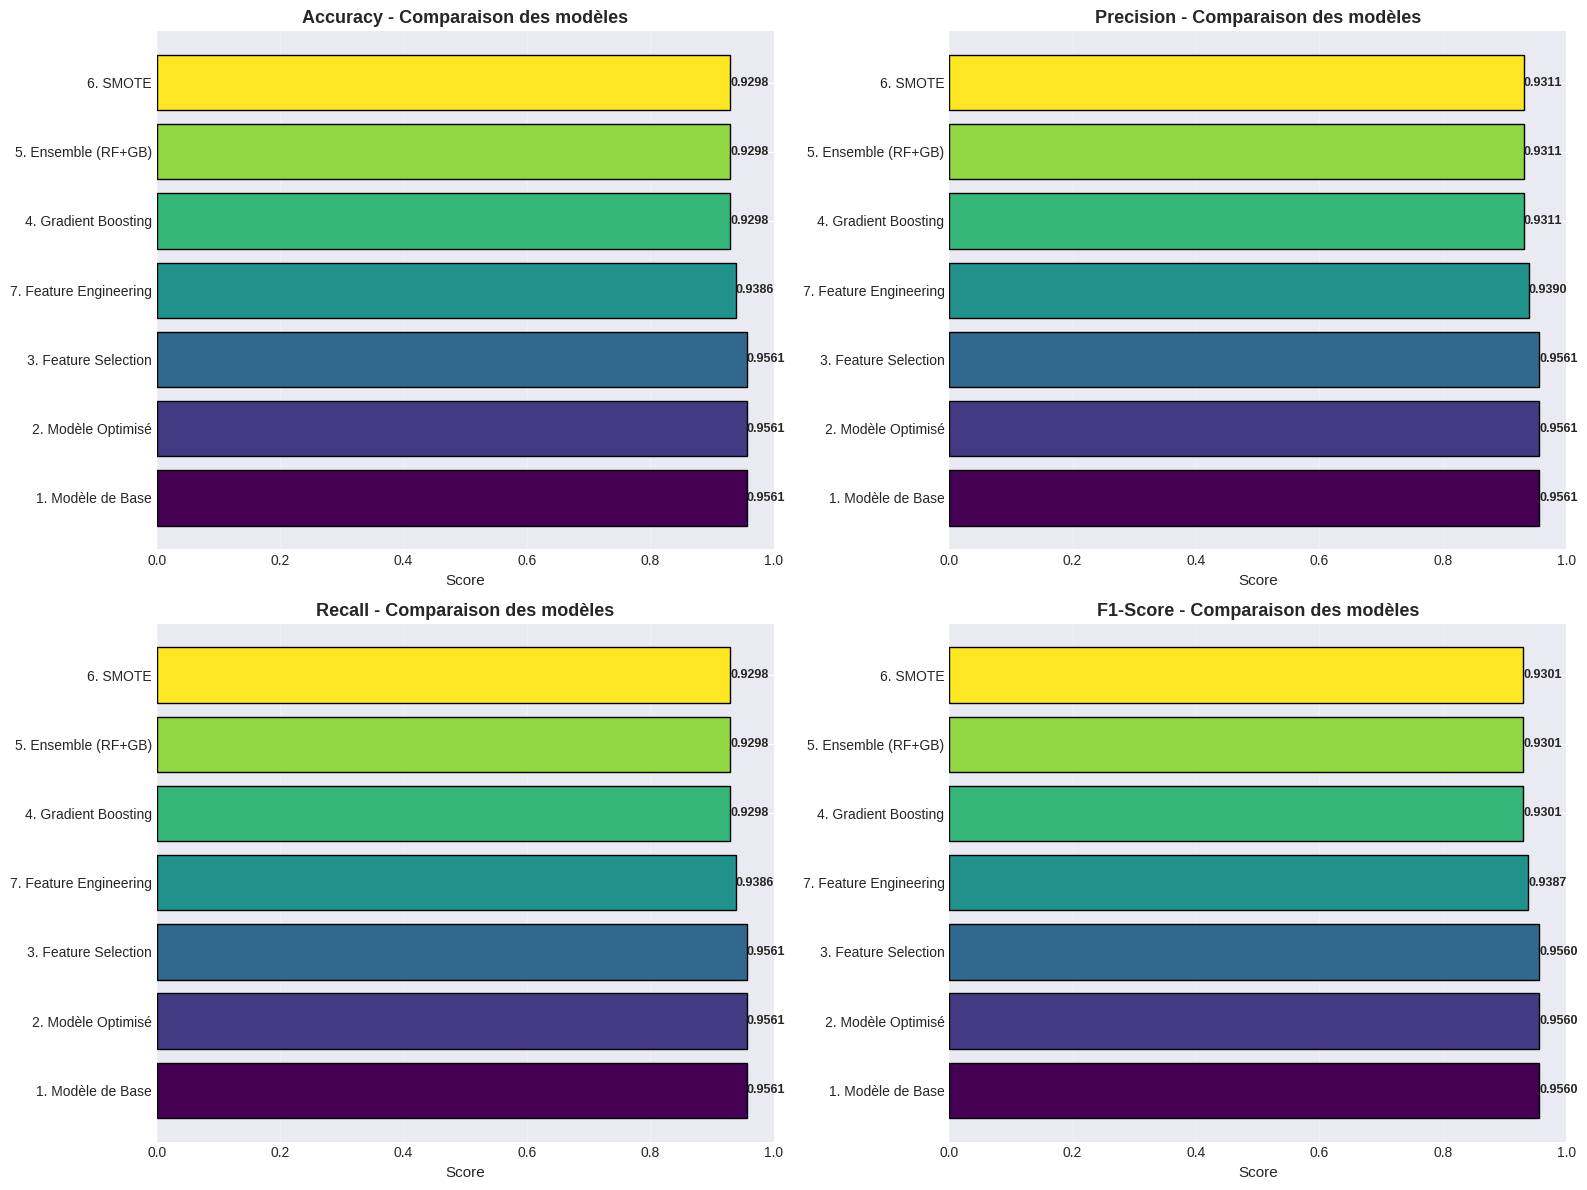

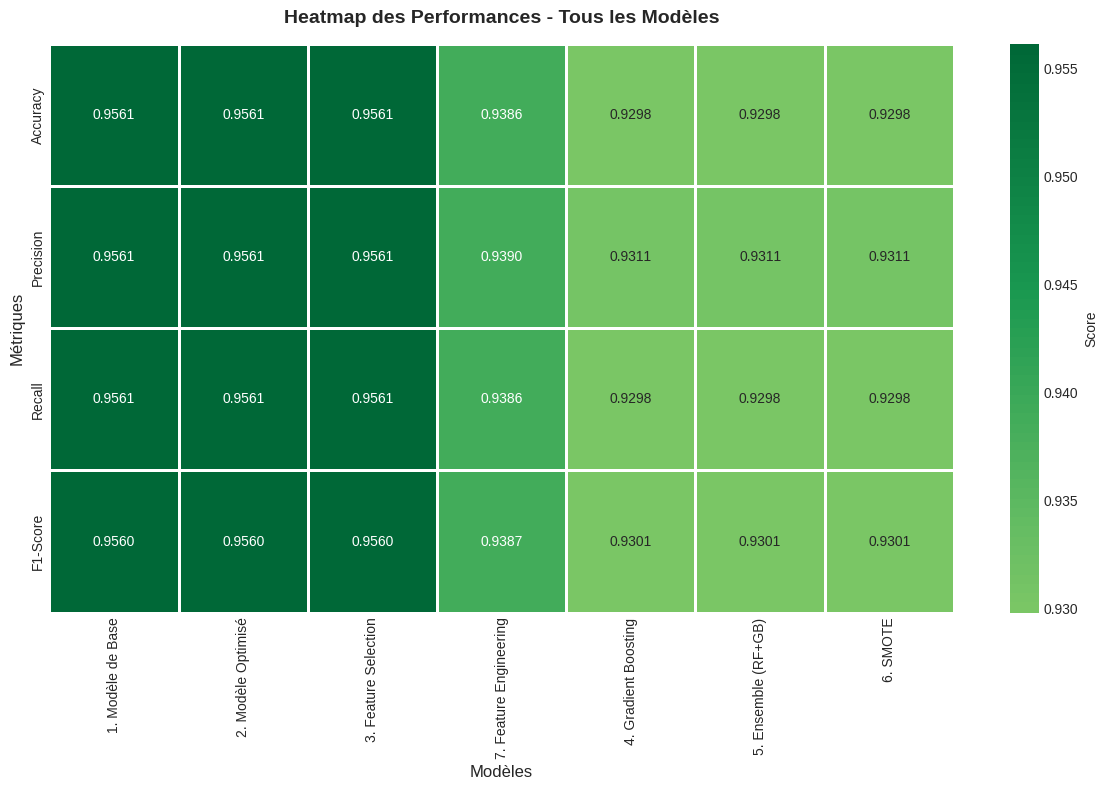

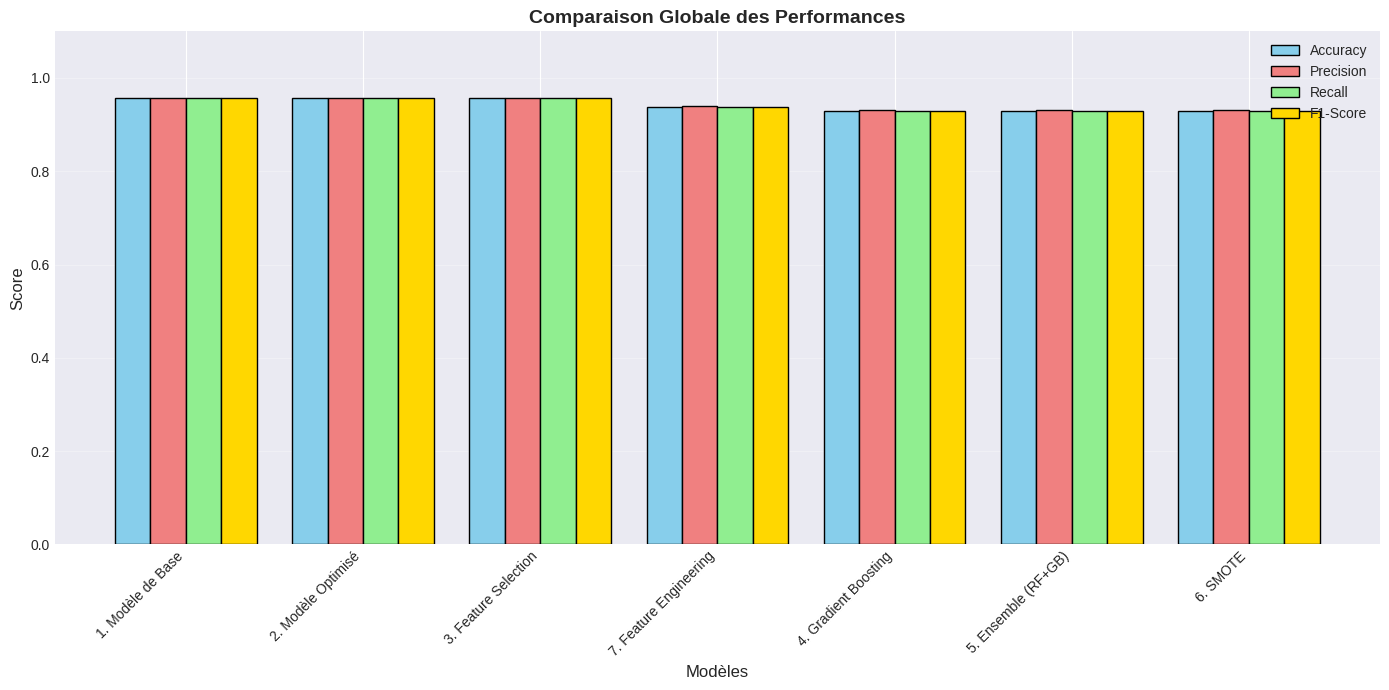


MATRICE DE CONFUSION - 1. Modèle de Base


<Figure size 1000x800 with 0 Axes>

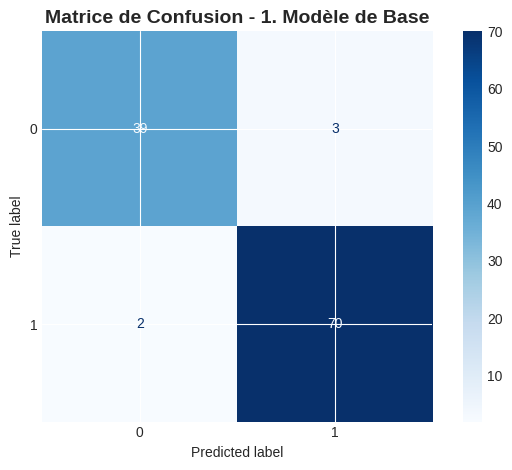


📋 RAPPORT DE CLASSIFICATION DÉTAILLÉ - MEILLEUR MODÈLE:
              precision    recall  f1-score   support

    Classe 0       0.95      0.93      0.94        42
    Classe 1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


COURBE ROC-AUC - 1. Modèle de Base


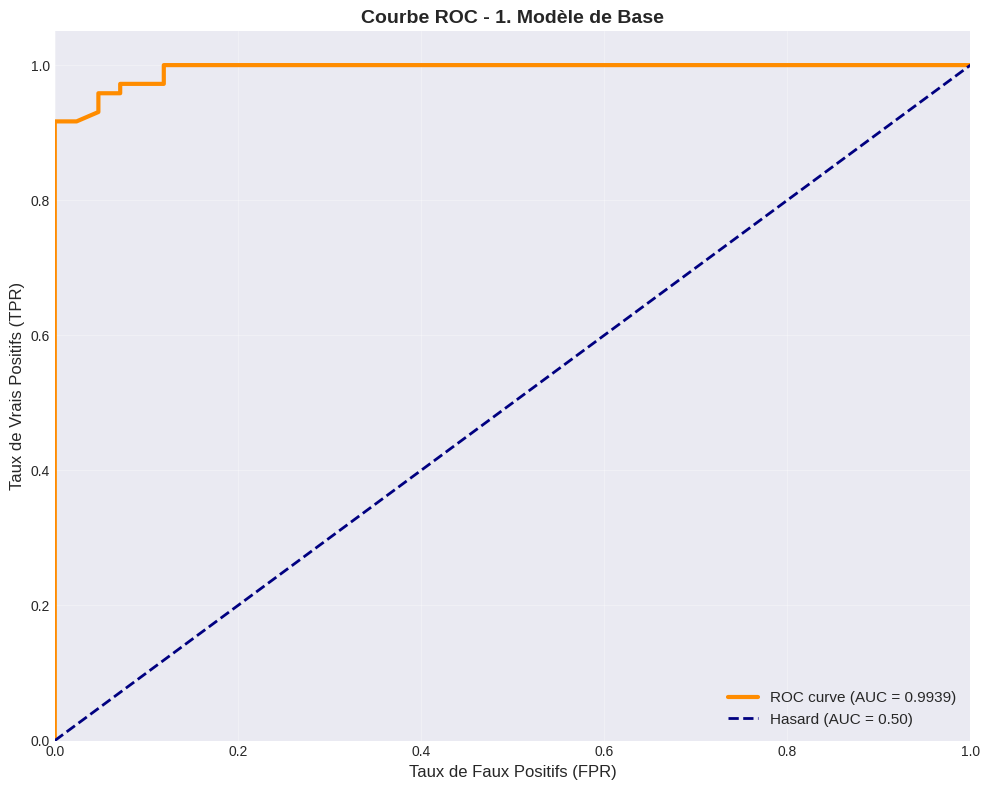


🎯 ROC-AUC Score: 0.9939

💾 Sauvegarde des résultats...
✅ Tableau récapitulatif sauvegardé: final_models_comparison.csv
✅ Meilleur modèle sauvegardé: best_random_forest_model.pkl
✅ Scaler sauvegardé: scaler.pkl

✅ ÉVALUATION FINALE TERMINÉE!

📊 RÉSUMÉ FINAL:
--------------
✅ Nombre total de modèles testés: 7
✅ Meilleur modèle: 1. Modèle de Base
✅ Meilleure Accuracy: 0.9561
✅ Meilleur F1-Score: 0.9560

📁 Fichiers générés:
- final_models_comparison.csv
- final_comparison_all_metrics.png
- final_heatmap.png
- final_bar_comparison.png
- confusion_matrix_best_model.png
- roc_curve_best_model.png
- best_random_forest_model.pkl
- scaler.pkl



In [36]:
# =============================================================================
# 11. ÉVALUATION FINALE ET COMPARAISON GLOBALE
# =============================================================================

print("\n" + "=" * 80)
print("📊 ÉVALUATION FINALE - COMPARAISON DE TOUS LES MODÈLES")
print("=" * 80)

# =============================================================================
# Rassembler toutes les prédictions
# =============================================================================

# Dictionnaire de tous les modèles et leurs prédictions
models_results = {
    '1. Modèle de Base': y_test_pred,
    '2. Modèle Optimisé': y_test_pred_opt,
    '3. Feature Selection': y_pred_fs,
    '4. Gradient Boosting': y_pred_gb,
    '5. Ensemble (RF+GB)': y_pred_ensemble,
    '6. SMOTE': y_pred_smote,
    '7. Feature Engineering': y_pred_fe
}

# =============================================================================
# Calculer toutes les métriques pour chaque modèle
# =============================================================================

results_summary = []

for model_name, predictions in models_results.items():
    results_summary.append({
        'Modèle': model_name,
        'Accuracy': accuracy_score(y_test, predictions),
        'Precision': precision_score(y_test, predictions, average='weighted'),
        'Recall': recall_score(y_test, predictions, average='weighted'),
        'F1-Score': f1_score(y_test, predictions, average='weighted')
    })

# Créer le DataFrame de comparaison
final_comparison = pd.DataFrame(results_summary)
final_comparison = final_comparison.sort_values('Accuracy', ascending=False)

print("\n📋 TABLEAU RÉCAPITULATIF DE TOUS LES MODÈLES:")
print("=" * 80)
print(final_comparison.to_string(index=False))

# Identifier le meilleur modèle
best_model = final_comparison.iloc[0]['Modèle']
best_accuracy = final_comparison.iloc[0]['Accuracy']
best_f1 = final_comparison.iloc[0]['F1-Score']

print(f"\n🏆 MEILLEUR MODÈLE: {best_model}")
print(f"   Accuracy:  {best_accuracy:.4f}")
print(f"   F1-Score:  {best_f1:.4f}")

# =============================================================================
# Visualisation comparative complète
# =============================================================================

# Graphique 1: Comparaison de toutes les métriques
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = plt.cm.viridis(np.linspace(0, 1, len(final_comparison)))

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]

    bars = ax.barh(
        final_comparison['Modèle'],
        final_comparison[metric],
        color=colors,
        edgecolor='black'
    )

    ax.set_xlabel('Score', fontsize=11)
    ax.set_title(f'{metric} - Comparaison des modèles', fontsize=13, fontweight='bold')
    ax.set_xlim([0, 1])
    ax.grid(axis='x', alpha=0.3)

    # Ajouter les valeurs sur les barres
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2,
                f'{width:.4f}',
                ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('final_comparison_all_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

# Graphique 2: Heatmap des performances
plt.figure(figsize=(12, 8))

heatmap_data = final_comparison.set_index('Modèle')[['Accuracy', 'Precision', 'Recall', 'F1-Score']]

sns.heatmap(
    heatmap_data.T,
    annot=True,
    fmt='.4f',
    cmap='RdYlGn',
    center=0.9,
    linewidths=1,
    cbar_kws={'label': 'Score'}
)

plt.title('Heatmap des Performances - Tous les Modèles', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Modèles', fontsize=12)
plt.ylabel('Métriques', fontsize=12)
plt.tight_layout()
plt.savefig('final_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Graphique 3: Evolution des performances
plt.figure(figsize=(14, 7))

x = np.arange(len(final_comparison))
width = 0.2

plt.bar(x - 1.5*width, final_comparison['Accuracy'], width, label='Accuracy', color='skyblue', edgecolor='black')
plt.bar(x - 0.5*width, final_comparison['Precision'], width, label='Precision', color='lightcoral', edgecolor='black')
plt.bar(x + 0.5*width, final_comparison['Recall'], width, label='Recall', color='lightgreen', edgecolor='black')
plt.bar(x + 1.5*width, final_comparison['F1-Score'], width, label='F1-Score', color='gold', edgecolor='black')

plt.xlabel('Modèles', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Comparaison Globale des Performances', fontsize=14, fontweight='bold')
plt.xticks(x, final_comparison['Modèle'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.ylim([0, 1.1])
plt.tight_layout()
plt.savefig('final_bar_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# Matrice de confusion du meilleur modèle
# =============================================================================

print("\n" + "=" * 80)
print(f"MATRICE DE CONFUSION - {best_model}")
print("=" * 80)

# Récupérer les prédictions du meilleur modèle
best_predictions = models_results[best_model]

cm_best = confusion_matrix(y_test, best_predictions)

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=rf_optimized.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Matrice de Confusion - {best_model}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix_best_model.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# Rapport de classification du meilleur modèle
# =============================================================================

print("\n📋 RAPPORT DE CLASSIFICATION DÉTAILLÉ - MEILLEUR MODÈLE:")
print("=" * 80)
print(classification_report(y_test, best_predictions,
                           target_names=[f'Classe {i}' for i in rf_optimized.classes_]))

# =============================================================================
# Courbe ROC-AUC du meilleur modèle (si classification binaire)
# =============================================================================

if len(np.unique(y)) == 2:
    print("\n" + "=" * 80)
    print(f"COURBE ROC-AUC - {best_model}")
    print("=" * 80)

    # Récupérer les probabilités du meilleur modèle
    # (Adapter selon le modèle)
    if '1. Modèle de Base' in best_model:
        best_proba = rf_base.predict_proba(X_test_scaled)[:, 1]
    elif '2. Modèle Optimisé' in best_model:
        best_proba = rf_optimized.predict_proba(X_test_scaled)[:, 1]
    elif '3. Feature Selection' in best_model:
        best_proba = rf_feature_selected.predict_proba(X_test_selected)[:, 1]
    elif '4. Gradient Boosting' in best_model:
        best_proba = gb_model.predict_proba(X_test_scaled)[:, 1]
    elif '5. Ensemble' in best_model:
        best_proba = ensemble_model.predict_proba(X_test_scaled)[:, 1]
    elif '6. SMOTE' in best_model:
        best_proba = rf_smote.predict_proba(X_test_scaled)[:, 1]
    elif '7. Feature Engineering' in best_model:
        best_proba = rf_fe.predict_proba(X_test_fe)[:, 1]

    # Calculer ROC
    fpr, tpr, thresholds = roc_curve(y_test, best_proba)
    roc_auc = roc_auc_score(y_test, best_proba)

    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=3, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Hasard (AUC = 0.50)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
    plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
    plt.title(f'Courbe ROC - {best_model}', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right", fontsize=11)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('roc_curve_best_model.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"\n🎯 ROC-AUC Score: {roc_auc:.4f}")

# =============================================================================
# Sauvegarder les résultats
# =============================================================================

print("\n💾 Sauvegarde des résultats...")

# Sauvegarder le tableau récapitulatif
final_comparison.to_csv('final_models_comparison.csv', index=False)
print("✅ Tableau récapitulatif sauvegardé: final_models_comparison.csv")

# Sauvegarder le meilleur modèle
import joblib

if '2. Modèle Optimisé' in best_model:
    best_model_obj = rf_optimized
elif '5. Ensemble' in best_model:
    best_model_obj = ensemble_model
elif '3. Feature Selection' in best_model:
    best_model_obj = rf_feature_selected
elif '6. SMOTE' in best_model:
    best_model_obj = rf_smote
elif '7. Feature Engineering' in best_model:
    best_model_obj = rf_fe
elif '4. Gradient Boosting' in best_model:
    best_model_obj = gb_model
else:
    best_model_obj = rf_base

joblib.dump(best_model_obj, 'best_random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("✅ Meilleur modèle sauvegardé: best_random_forest_model.pkl")
print("✅ Scaler sauvegardé: scaler.pkl")

print("\n" + "=" * 80)
print("✅ ÉVALUATION FINALE TERMINÉE!")
print("=" * 80)

print(f"""
📊 RÉSUMÉ FINAL:
--------------
✅ Nombre total de modèles testés: {len(models_results)}
✅ Meilleur modèle: {best_model}
✅ Meilleure Accuracy: {best_accuracy:.4f}
✅ Meilleur F1-Score: {best_f1:.4f}

📁 Fichiers générés:
- final_models_comparison.csv
- final_comparison_all_metrics.png
- final_heatmap.png
- final_bar_comparison.png
- confusion_matrix_best_model.png
- roc_curve_best_model.png
- best_random_forest_model.pkl
- scaler.pkl
""")